# Setup

In [41]:
import pandas as pd
import polars as pl 
import numpy as np

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from tools import preprocess, get_corpus_list
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (confusion_matrix)

In [2]:
data = pl.read_csv("./dataset.csv")

In [3]:
data.head()

app_id,app_name,review_text,review_score,review_votes
i64,str,str,i64,i64
10,"""Counter-Strike""","""Ruined my life.""",1,0
10,"""Counter-Strike""","""This will be more of a ''my ex…",1,1
10,"""Counter-Strike""","""This game saved my virginity.""",1,0
10,"""Counter-Strike""","""• Do you like original games? …",1,0
10,"""Counter-Strike""",""" Easy to learn, hard to…",1,1


In [4]:
data.shape

(6417106, 5)

In [5]:
data["review_score"].value_counts()["review_score"]

review_score
i64
1
-1


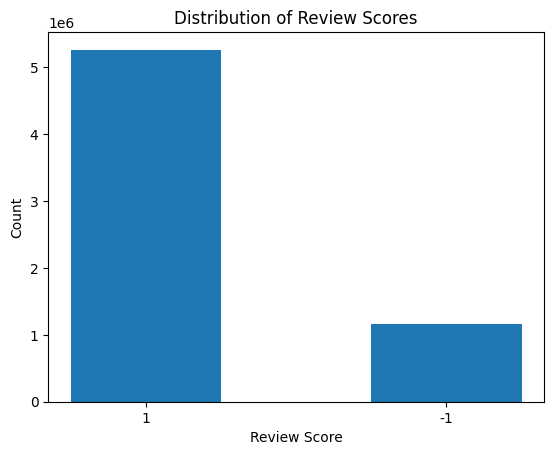

In [6]:
value_counts = data["review_score"].value_counts()
cols = value_counts["review_score"].to_numpy().astype(str)
counts = value_counts["count"].to_numpy() 

plt.bar(cols, counts, width=0.5)
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.title("Distribution of Review Scores")
plt.show()

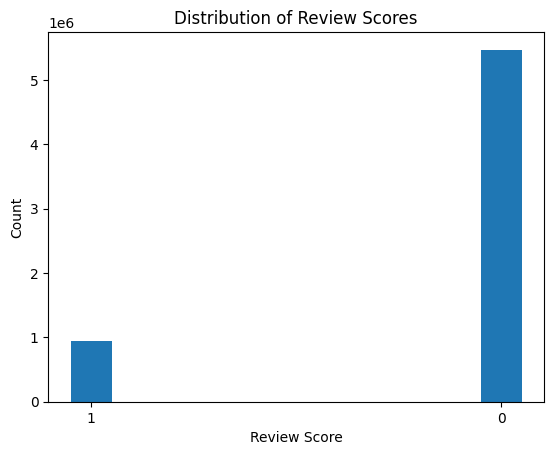

In [7]:
value_counts = data["review_votes"].value_counts()
cols = value_counts["review_votes"].to_numpy().astype(str)
counts = value_counts["count"].to_numpy() 

plt.bar(cols, counts, width=0.1)
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.title("Distribution of Review Scores")
plt.show()

# Tien xu ly du lieu

In [8]:
data.null_count()

app_id,app_name,review_text,review_score,review_votes
u32,u32,u32,u32,u32
0,183234,7305,0,0


In [9]:
data.null_count()*100/len(data)

app_id,app_name,review_text,review_score,review_votes
f64,f64,f64,f64,f64
0.0,2.855399,0.113836,0.0,0.0


In [10]:
data["review_text"].null_count()/len(data)

0.0011383636174936177

In [11]:
data = data[:, ["review_text", "review_votes"]]

In [12]:
data = data.drop_nulls()

In [13]:
data.null_count()*100/len(data)

review_text,review_votes
f64,f64
0.0,0.0


In [14]:
data = data.unique()

In [15]:
data.shape

(4483987, 2)

## Chon 1/4 du lieu

In [35]:
small_data = data.sample(10_000, shuffle=True, seed=42)

In [36]:
X = small_data["review_text"]
y = small_data["review_votes"]

In [37]:
X = preprocess(X.to_numpy())

X = get_corpus_list(X)

In [38]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [39]:
X = X.toarray()

## Chia du lieu

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, stratify=y)

## Chuan hoa

In [40]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

# ML

## Logistic

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_pred = log_reg.predict(X_test)
log_cfs_mtx = confusion_matrix(log_pred, y_test)

<Axes: >

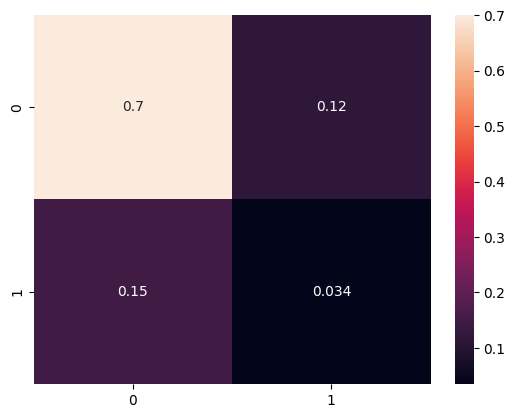

In [44]:
sns.heatmap(log_cfs_mtx/np.sum(log_cfs_mtx), annot=True)

## SVM

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)
svc_cfs_mtx = confusion_matrix(svc_pred, y_test)

In [ ]:
sns.heatmap(svc_cfs_mtx/np.sum(svc_cfs_mtx), annot=True)

# RNN

In [ ]:
X.shape